# Time Series, Custom Class

In [10]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../../../src')

In [11]:
import pandas as pd
import numpy as np
import ontime as on

---
## Generation of random time series

In [12]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [13]:
ts[0:5]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[ 1.27871477]],

       [[ 0.66411604]],

       [[ 0.378142  ]],

       [[-0.48877604]],

       [[-0.81719077]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Use `TimeSeries` object

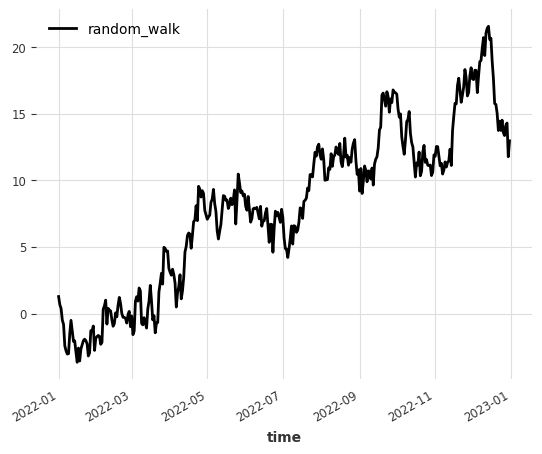

In [14]:
ts.plot();

---
## Custom Class Creation

### Create custom detector

In [15]:
from ontime.core.detector.abstract_detector import AbstractDetector

class MyDetector(AbstractDetector):

    def __init__(self):
        super().__init__()

    def detect(self, ts):
        print('I detected')
        

Load custom detector in OnTime

In [16]:
on.detectors.get_all()

['threshold', 'quantile']

In [17]:
on.detectors.load('my_detector', MyDetector)

In [18]:
on.detectors.get_all()

['threshold', 'quantile', 'my_detector']

In [19]:
on.detectors.my_detector().detect(ts)

I detected


---
## Data loading helpers

### darts -> ontime
You can convert a timeseries from dart's TimeSeries object type to ontime's TimeSeries type

In [20]:
from darts import datasets as dd

dartsAirPassengers = dd.AirPassengersDataset().load()
print(type(dartsAirPassengers))
dartsAirPassengers.head()

<class 'darts.timeseries.TimeSeries'>


<TimeSeries (DataArray) (Month: 5, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1949-05-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [21]:
ontimeAirPassengers = on.TimeSeries.from_darts(dartsAirPassengers)
print(type(ontimeAirPassengers))
ontimeAirPassengers.head()

<class 'ontime.core.time_series.time_series.TimeSeries'>


<TimeSeries (DataArray) (Month: 5, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1949-05-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### pandas -> ontime
You can convert a pandas dataframe to ontime's TimeSeries format, provided the dataframe's index is time-based.

In [22]:
from sklearn.datasets import fetch_openml

pandasAmd = fetch_openml("AMD-Stock-Prices-Historical-Data", version=1, as_frame=True, parser="pandas").frame
print(type(pandasAmd))
# set index to be compliant with TimeEval's canonical format
pandasAmd.index= pandasAmd['Date'].astype('datetime64[ns]')
del pandasAmd['Date']
pandasAmd.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [23]:
ontimeAmd = on.TimeSeries.from_pandas(pandasAmd, freq='D')
ontimeAmd.head()

<TimeSeries (DataArray) (Date: 5, component: 6, sample: 1)>
array([[[0.00000000e+00],
        [3.30208302e+00],
        [3.12500000e+00],
        [3.14583302e+00],
        [3.14583302e+00],
        [2.19600000e+05]],

       [[0.00000000e+00],
        [3.12500000e+00],
        [2.93750000e+00],
        [3.03125000e+00],
        [3.03125000e+00],
        [7.27200000e+05]],

       [[0.00000000e+00],
        [3.08333302e+00],
        [3.02083302e+00],
        [3.04166698e+00],
        [3.04166698e+00],
        [2.95200000e+05]],

       [[0.00000000e+00],
        [3.06250000e+00],
        [3.01041698e+00],
        [3.01041698e+00],
        [3.01041698e+00],
        [1.59600000e+05]],

       [[0.00000000e+00],
        [3.02083302e+00],
        [2.90625000e+00],
        [2.91666698e+00],
        [2.91666698e+00],
        [1.30800000e+05]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1980-03-17 1980-03-18 ... 1980-03-21
  * component  (component) object 'Open' 'High' 'Low' ... 'Adj_Close' 'Volume'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='Date'>

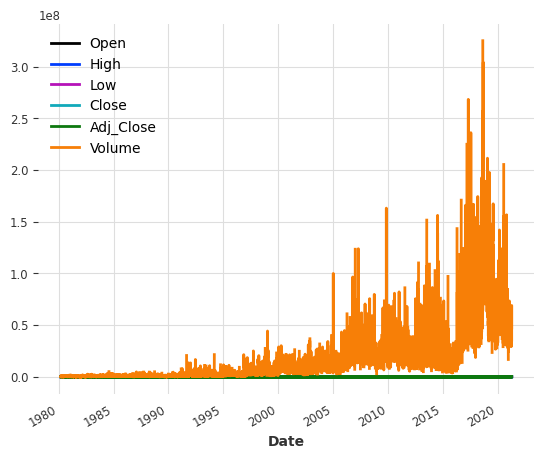

In [24]:
ontimeAmd.plot()

### csv -> ontime
You can convert data from a csv file to ontime's TimeSeries format, provided the index is time-based and correctly formatted.

<Axes: xlabel='time'>

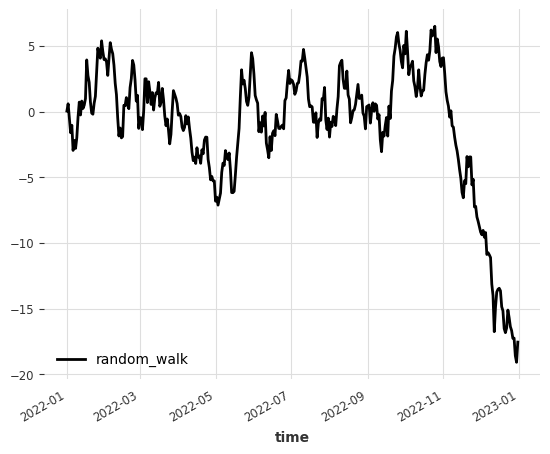

In [25]:
# let's generate some sample data
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))
ts.pd_dataframe().to_csv('sample_series.csv')

# load that sample data
ts = on.TimeSeries.from_csv('sample_series.csv', index_col='time')
ts.plot()

### data -> ontime
You can assemble a TimeSeries if you have a data table and column names, provided the index is time-based and correctly formatted.

In [26]:
# generate some data
from datetime import datetime
data = np.random.rand(200,3)
index = pd.date_range(datetime.today(), periods=200).tolist()
columns = ['col1', 'col2', 'col3']

<Axes: xlabel='time'>

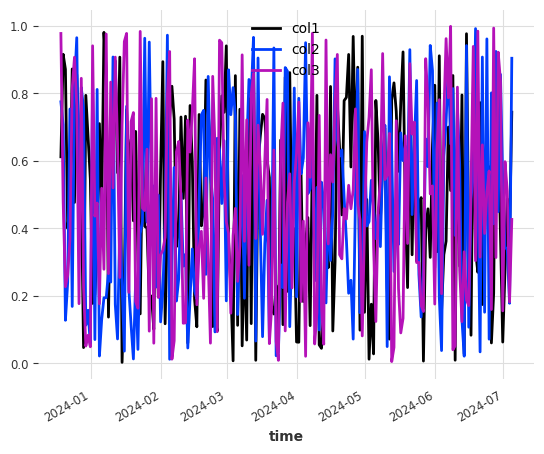

In [27]:
# assemble into a timeseries
ts = on.TimeSeries.from_data(data, index = index, columns = columns)
ts.plot()